# Gaussian Naive Bayes Credit Risk Classifier with Visualizations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Generate synthetic data
def generate_synthetic_data(num_samples=200):
    np.random.seed(42)
    data = {'Income': [], 'Credit_Score': [], 'Loan_Amount': [], 'Risk': []}
    for _ in range(num_samples):
        if np.random.rand() < 0.7:
            data['Income'].append(np.random.normal(60000, 15000))
            data['Credit_Score'].append(np.random.normal(700, 50))
            data['Loan_Amount'].append(np.random.normal(20000, 8000))
            data['Risk'].append(0)
        else:
            data['Income'].append(np.random.normal(35000, 10000))
            data['Credit_Score'].append(np.random.normal(550, 70))
            data['Loan_Amount'].append(np.random.normal(40000, 15000))
            data['Risk'].append(1)

    df = pd.DataFrame(data)
    df['Income'] = df['Income'].apply(lambda x: max(10000, x))
    df['Credit_Score'] = df['Credit_Score'].apply(lambda x: max(300, x))
    df['Loan_Amount'] = df['Loan_Amount'].apply(lambda x: max(1000, x))
    return df


In [3]:
# Naive Bayes Classifier
class GaussianNaiveBayes:
    def __init__(self):
        self.priors = {}
        self.means = defaultdict(dict)
        self.variances = defaultdict(dict)
        self.classes = []

    def _gaussian_pdf(self, x, mean, variance):
        if variance == 0:
            return 1.0 if x == mean else 0.0
        exponent = np.exp(-((x - mean)**2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def fit(self, X, y):
        self.classes = np.unique(y)
        num_samples, num_features = X.shape
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / num_samples
            for feature_name in X.columns:
                self.means[c][feature_name] = np.mean(X_c[feature_name])
                self.variances[c][feature_name] = np.var(X_c[feature_name]) + 1e-9

    def predict(self, X):
        predictions = []
        for _, sample in X.iterrows():
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = 0
                for feature_name in X.columns:
                    feature_value = sample[feature_name]
                    mean = self.means[c][feature_name]
                    variance = self.variances[c][feature_name]
                    likelihood += np.log(self._gaussian_pdf(feature_value, mean, variance))
                posterior = prior + likelihood
                posteriors.append((posterior, c))
            predictions.append(max(posteriors)[1])
        return np.array(predictions)


In [23]:
# Main
df = generate_synthetic_data(num_samples=500)

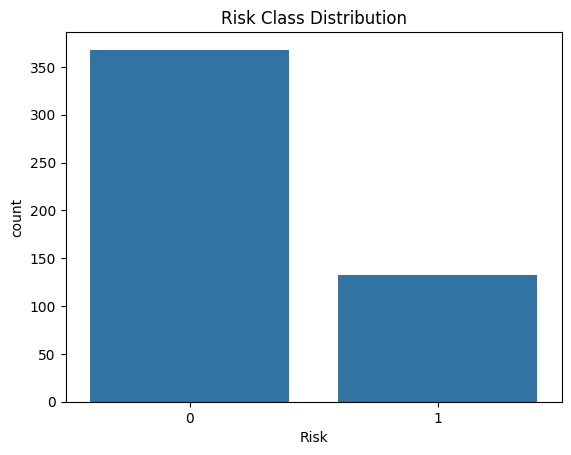

In [24]:
# Visualizations
sns.countplot(x='Risk', data=df)
plt.title("Risk Class Distribution")
plt.show()

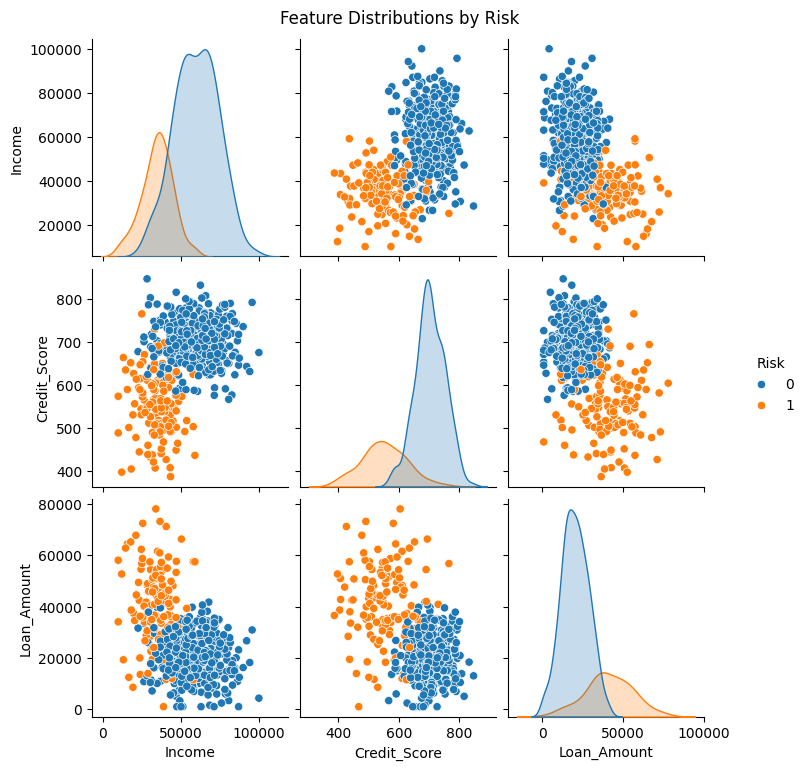

In [6]:
sns.pairplot(df, hue="Risk", diag_kind="kde")
plt.suptitle("Feature Distributions by Risk", y=1.02)
plt.show()

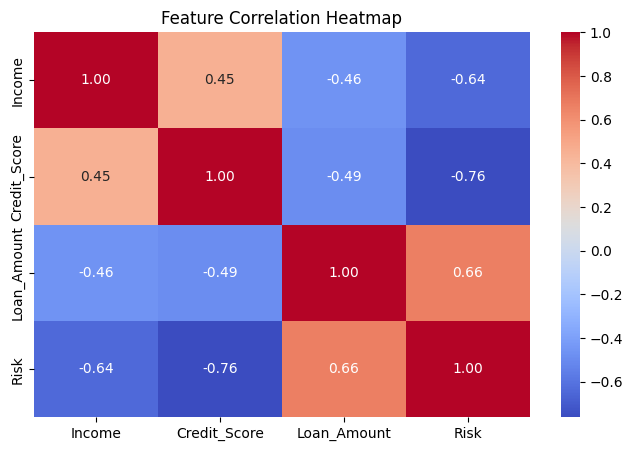

In [7]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Model training and testing
X = df[['Income', 'Credit_Score', 'Loan_Amount']]
y = df['Risk']
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = GaussianNaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Evaluation
accuracy = np.mean(y_pred == y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9700



Confusion Matrix:
 [[71  2]
 [ 1 26]]


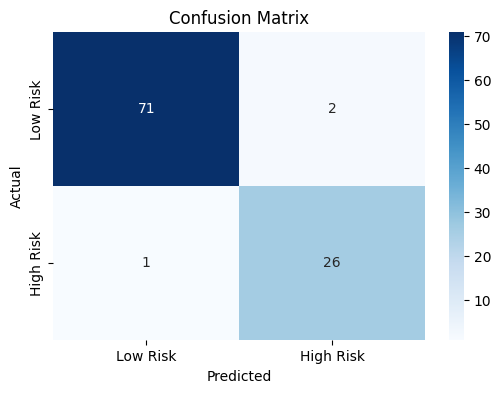

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:

# Sample predictions
sample_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}).head(10)
print("\nSample Predictions vs Actual:")
print(sample_df)


Sample Predictions vs Actual:
   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0
5       0          0
6       0          0
7       1          1
8       0          0
9       0          0


In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Risk', 'High Risk']))


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.99      0.97      0.98        73
   High Risk       0.93      0.96      0.95        27

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.97      0.97      0.97       100



In [18]:
# Predicting new individuals
new_high = pd.DataFrame([[75000, 780, 15000]], columns=['Income', 'Credit_Score', 'Loan_Amount'])
new_low = pd.DataFrame([[30000, 500, 50000]], columns=['Income', 'Credit_Score', 'Loan_Amount'])

pred_high = model.predict(new_high)
pred_low = model.predict(new_low)

In [14]:
print(f"\nNew Individual 1 (High Income/Credit): Predicted = {'Low Risk' if pred_high[0] == 0 else 'High Risk'}")
print(f"New Individual 2 (Low Income/Credit): Predicted = {'Low Risk' if pred_low[0] == 0 else 'High Risk'}")



New Individual 1 (High Income/Credit): Predicted = Low Risk
New Individual 2 (Low Income/Credit): Predicted = High Risk
